<a href="https://colab.research.google.com/github/gjrg28/2044-numpy-analisis-numerico-eficiente-con-python/blob/main/TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
clientes = pd.read_json ('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
clientes



,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [3]:
# 1. Definimos las columnas que sabemos que tienen diccionarios
columnas = ['customer', 'phone', 'internet', 'account']

# 2. Usamos un bucle para procesar una por una
for col in columnas:
    # pd.json_normalize convierte los diccionarios en columnas independientes
    # Usamos record_prefix para saber de qué columna original venía cada dato
    temporal_clientes = pd.json_normalize(clientes[col])

    # Le ponemos prefijos a las nuevas columnas (ej: customer_gender, customer_age)
    temporal_clientes.columns = [f"{col}_{subcol}" for subcol in temporal_clientes.columns]

    # Unimos las nuevas columnas al DataFrame y eliminamos la columna original con el diccionario
    clientes = pd.concat([clientes.drop(col, axis=1), temporal_clientes], axis=1)

# 3. Ahora puedes ver el DataFrame expandido
clientes

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [4]:
clientes.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
columnas2 = list (clientes.columns)


In [6]:
columnas2

['customerID',
 'Churn',
 'customer_gender',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'customer_tenure',
 'phone_PhoneService',
 'phone_MultipleLines',
 'internet_InternetService',
 'internet_OnlineSecurity',
 'internet_OnlineBackup',
 'internet_DeviceProtection',
 'internet_TechSupport',
 'internet_StreamingTV',
 'internet_StreamingMovies',
 'account_Contract',
 'account_PaperlessBilling',
 'account_PaymentMethod',
 'account_Charges.Monthly',
 'account_Charges.Total']

In [7]:
clientes.columns = clientes.columns.str.lower()
clientes

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges.monthly,account_charges.total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [8]:
# Crear la columna dividiendo entre 30
clientes['cuentas_diarias'] = clientes['account_charges.monthly'] / 30

#  Redondear a 2 decimales para que se vea más limpio
clientes['cuentas_diarias'] = clientes['cuentas_diarias'].round(2)

clientes.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges.monthly,account_charges.total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.80


In [9]:
# Usamos una lista de comprensión para excluir 'churn'
columnas_a_transformar = [col for col in clientes.columns if col != 'churn']

# 2. Aplicamos el reemplazo solo en esas columnas
clientes[columnas_a_transformar] = clientes[columnas_a_transformar].replace({'Yes': 1, 'No': 0})

clientes.head()

/tmp/ipython-input-3972443541.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clientes[columnas_a_transformar] = clientes[columnas_a_transformar].replace({'Yes': 1, 'No': 0})


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges.monthly,account_charges.total,cuentas_diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.80


In [10]:
import numpy as np

# Reemplazamos el espacio vacío por un valor nulo (NaN)
clientes['churn'] = clientes['churn'].replace('', np.nan)

In [11]:
vacios = clientes['churn'].isna().sum()
print(f"Hay {vacios} filas con el campo Churn vacío.")

Hay 224 filas con el campo Churn vacío.


In [12]:
# Eliminamos las filas donde Churn sea NaN
clientes = clientes.dropna(subset=['churn'])

# Verificamos que ya no existan espacios o nulos
print(clientes['churn'].unique())

['No' 'Yes']


##**El "Vistazo General**

In [13]:
# Aplicamos el comando al dataframe 'clientes'
# Usamos .T para "transponerlo" (que las columnas salgan hacia abajo) y leerlo mejor
resumen = clientes.describe().T
resumen

,count,mean,std,min,25%,50%,75%,max
customer_seniorcitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
customer_partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
customer_dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
customer_tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
phone_phoneservice,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
account_paperlessbilling,7043.0,0.592219,0.491457,0.00,0.00,1.00,1.00,1.00
account_charges.monthly,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
cuentas_diarias,7043.0,2.158675,1.003088,0.61,1.18,2.34,2.99,3.96


##**Entender la Evasión (Churn)**

In [14]:
# Contar cuántos hay de cada uno
conteo_churn = clientes['churn'].value_counts()
conteo_churn

,count
churn,
No,5174
Yes,1869


In [15]:
# Verlo en porcentaje
porcentaje_churn = clientes['churn'].value_counts(normalize=True) * 100
porcentaje_churn

,proportion
churn,
No,73.463013
Yes,26.536987


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir 'Yes' a 1 y 'No' a 0 si la columna 'Churn' aún es categórica
clientes['churn'] = clientes['churn'].replace({'Yes': 1, 'No': 0}).astype(int)

# Contar cuántos clientes hay en cada categoría (0=se quedan, 1=se van)
conteo_churn = clientes['churn'].value_counts()

# Calcular los porcentajes
porcentaje_churn = clientes['churn'].value_counts(normalize=True) * 100

print("--- Conteo de Clientes por Churn ---")
conteo_churn
print("\n--- Porcentaje de Clientes por Churn ---")
porcentaje_churn

--- Conteo de Clientes por Churn ---

--- Porcentaje de Clientes por Churn ---


/tmp/ipython-input-2385686338.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clientes['churn'] = clientes['churn'].replace({'Yes': 1, 'No': 0}).astype(int)
/tmp/ipython-input-2385686338.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes['churn'] = clientes['churn'].replace({'Yes': 1, 'No': 0}).astype(int)


,proportion
churn,
0,73.463013
1,26.536987


/tmp/ipython-input-562219085.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=clientes, palette='viridis') # Crea el gráfico de barras


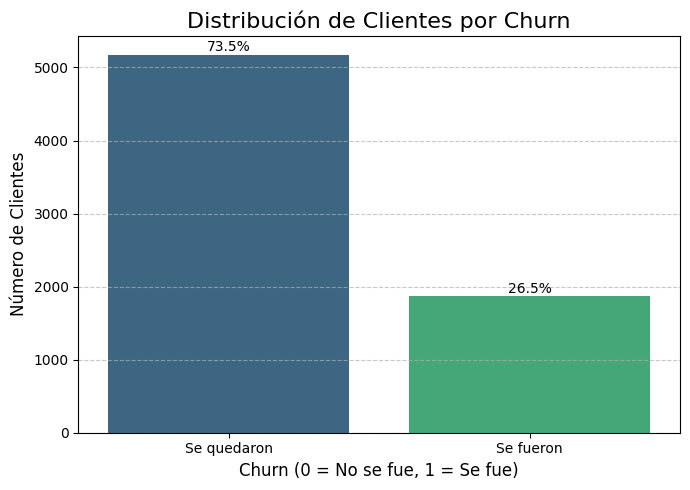

In [17]:
plt.figure(figsize=(7, 5)) # Define el tamaño del gráfico
sns.countplot(x='churn', data=clientes, palette='viridis') # Crea el gráfico de barras

plt.title('Distribución de Clientes por Churn', fontsize=16) # Título del gráfico
plt.xlabel('Churn (0 = No se fue, 1 = Se fue)', fontsize=12) # Etiqueta del eje X
plt.ylabel('Número de Clientes', fontsize=12) # Etiqueta del eje Y
plt.xticks(ticks=[0, 1], labels=['Se quedaron', 'Se fueron']) # Nombres más descriptivos en el eje X
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula suave

# Añadir los porcentajes encima de las barras para mayor claridad
for index, row in porcentaje_churn.items():
    plt.text(x=index, y=conteo_churn[index] + 50, # Posición del texto
             s=f'{row:.1f}%', # Formato del texto (un decimal)
             color='black', ha='center', fontsize=10)

plt.tight_layout() # Ajusta el diseño para que no se corten las etiquetas
plt.show() # Muestra el gráfico

##**Comparar Grupos (Análisis por Churn)**

###Los clientes que se van (Churn=1) pagan más al mes que los que se quedan (Churn=0)?

In [18]:
# Agrupamos por la columna Churn y calculamos la media de los cargos mensuales
comparativa = clientes.groupby('churn')['account_charges.monthly'].mean()
print("Promedio de pago mensual:")
comparativa

Promedio de pago mensual:


,account_charges.monthly
churn,
0,61.265124
1,74.441332


##**Revisar la Antigüedad (tenure)**

In [19]:
# Calculamos la mediana de meses para los que se fueron
mediana_meses_evasion = clientes[clientes['churn'] == 'Yes']['customer_tenure'].median()
print(f"La mitad de los clientes que se van lo hacen antes de los {mediana_meses_evasion} meses.")

La mitad de los clientes que se van lo hacen antes de los nan meses.


##**Recuento de evasión por variables categóricas**

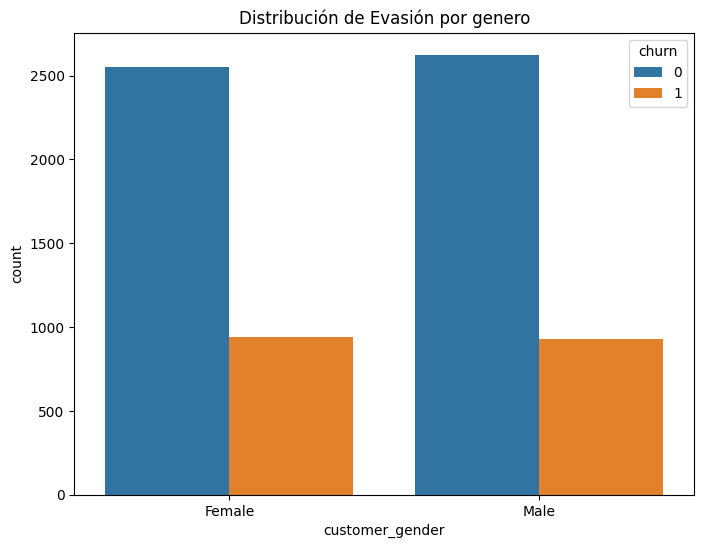

In [20]:
# Ejemplo: Evasión por  Genero
plt.figure(figsize=(8, 6))
sns.countplot(x='customer_gender', hue='churn', data=clientes)
plt.title('Distribución de Evasión por genero')
plt.show()

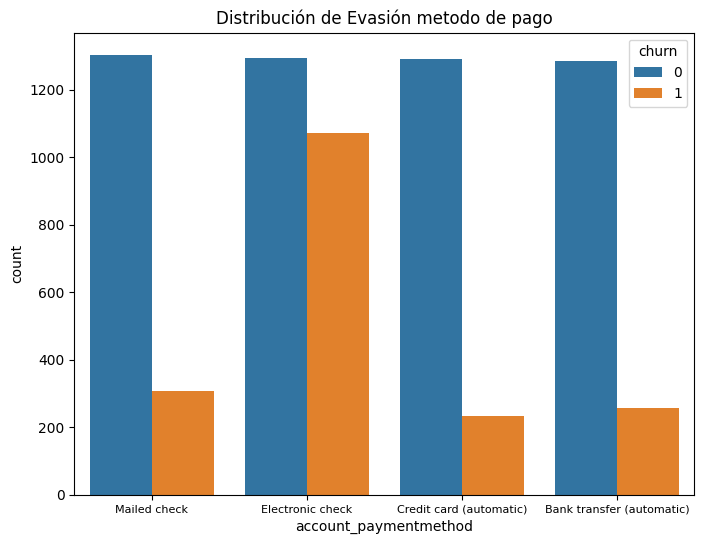

In [21]:
# Ejemplo: Evasión por metodo de pago
plt.figure(figsize=(8, 6), )
sns.countplot(x='account_paymentmethod', hue='churn', data=clientes)
plt.xticks(fontsize=8)
plt.title('Distribución de Evasión metodo de pago')
plt.show()

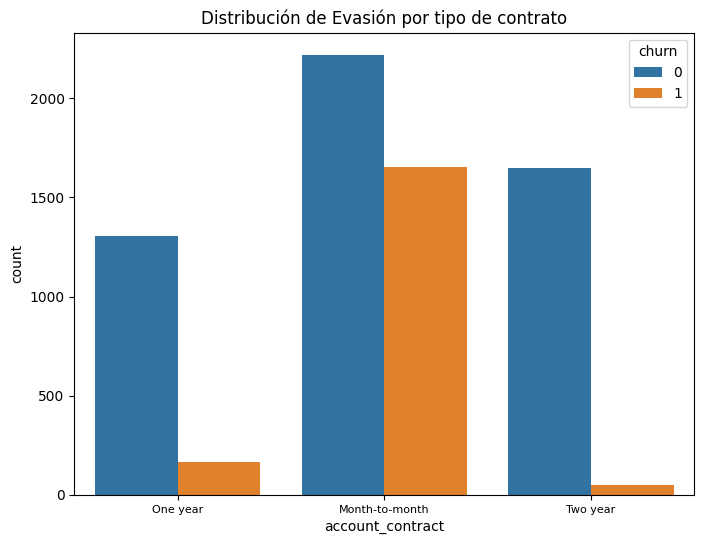

In [22]:
# Ejemplo: Evasión por tipo de cotrato
plt.figure(figsize=(8, 6), )
sns.countplot(x='account_contract', hue='churn', data=clientes)
plt.xticks(fontsize=8)
plt.title('Distribución de Evasión por tipo de contrato')
plt.show()

##**Conteo de evasión por variables numéricas**

/tmp/ipython-input-3445041477.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(clientes[clientes['churn'] == 1]['customer_tenure'], label='Se quedan', shade=True)
/tmp/ipython-input-3445041477.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(clientes[clientes['churn'] == 0]['customer_tenure'], label='Cancelan', shade=True)


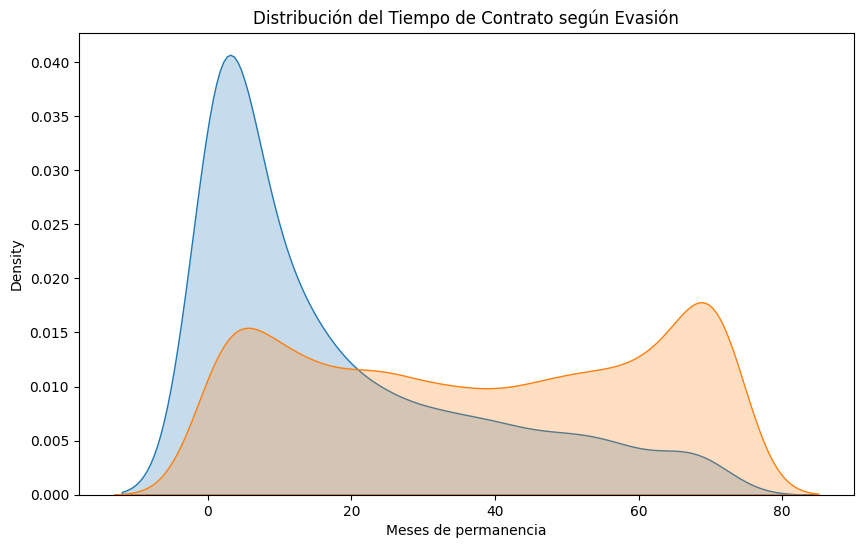

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comparando el tiempo de contrato (Tenure)
plt.figure(figsize=(10,6))
sns.kdeplot(clientes[clientes['churn'] == 1]['customer_tenure'], label='Se quedan', shade=True)
sns.kdeplot(clientes[clientes['churn'] == 0]['customer_tenure'], label='Cancelan', shade=True)
plt.title('Distribución del Tiempo de Contrato según Evasión')
plt.xlabel('Meses de permanencia')
plt.show()

In [30]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   int64  
 5   customer_dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   int64  
 8   phone_multiplelines        7043 non-null   object 
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   object 
 11  internet_onlinebackup      7043 non-null   object 
 12  internet_deviceprotection  7043 non-null   object 
 13  internet_techsupport       7043 non-null   object 
 1

In [37]:
# Sintaxis: df.iloc[fila, columna]

# Ejemplo: Valor en la fila 5 de la columna 'Total_Gastado'
valor = clientes['account_charges.total'].iloc[945]
print(valor)

In [38]:
# 1. Reemplazamos los espacios vacíos (o con solo espacios) por NaN
clientes['account_charges.total'] = clientes['account_charges.total'].replace(r'^\s*$', np.nan, regex=True)

# 2. Eliminamos las filas que ahora tienen NaN en esa columna
clientes = clientes.dropna(subset=['account_charges.total'])

/tmp/ipython-input-506671421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes['account_charges.total'] = clientes['account_charges.total'].replace(r'^\s*$', np.nan, regex=True)


In [39]:

# Convertir la columna directamente
clientes['account_charges.total'] = pd.to_numeric(clientes['account_charges.total']).astype('int64')

/tmp/ipython-input-3545197236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes['account_charges.total'] = pd.to_numeric(clientes['account_charges.total']).astype('int64')


In [40]:
# Comparamos promedios de variables numéricas
analisis_numerico = clientes.groupby('churn')[['customer_tenure', 'account_charges.monthly', 'account_charges.total']].mean()
print(analisis_numerico)

       customer_tenure  account_charges.monthly  account_charges.total
churn                                                                 
0            37.650010                61.307408            2554.875266
1            17.979133                74.441332            1531.323167


##**Relación entre la cuenta diaria y la evasión.**

/tmp/ipython-input-4000568817.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='cuentas_diarias', data=clientes, palette='Set2')


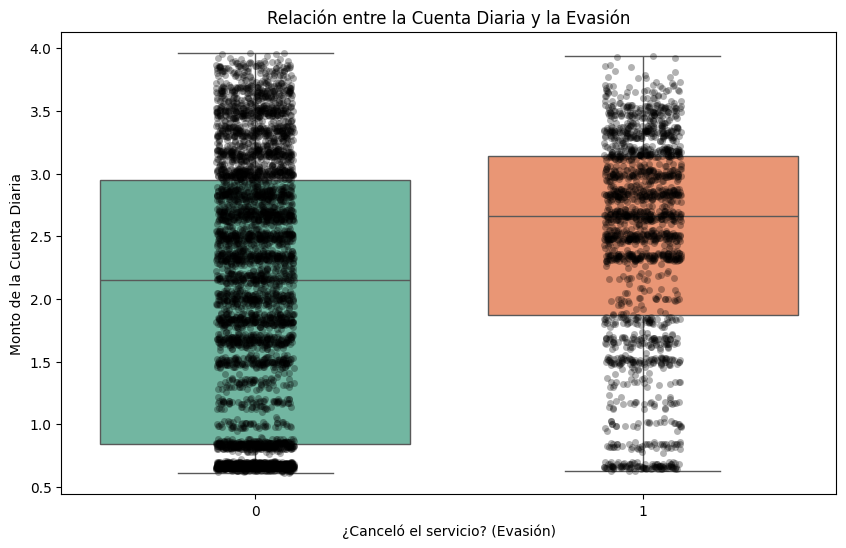

In [41]:
plt.figure(figsize=(10, 6))
# Creamos el boxplot
sns.boxplot(x='churn', y='cuentas_diarias', data=clientes, palette='Set2')
# Opcional: añadimos los puntos reales para ver la densidad
sns.stripplot(x='churn', y='cuentas_diarias', data=clientes, color='black', alpha=0.3)

plt.title('Relación entre la Cuenta Diaria y la Evasión')
plt.xlabel('¿Canceló el servicio? (Evasión)')
plt.ylabel('Monto de la Cuenta Diaria')
plt.show()

##**Cómo la cantidad de servicios contratados afecta la probabilidad de churn.**


In [68]:
# Diccionario con nombres viejos y nombres nuevos más cortos
nuevos_nombres = {
    'internet_internetservice': 'Servicio_Internet',
    'internet_onlinesecurity': 'Seguridad_Online',
    'internet_onlinebackup': 'Respaldo_Cloud',
    'internet_deviceprotection': 'Proteccion_Dispositivo',
    'internet_techsupport': 'Soporte_Tecnico',
    'internet_streamingtv': 'Streaming_TV',
    'internet_streamingmovies': 'Streaming_Películas'
}

# Renombramos en el DataFrame original
clientes = clientes.rename(columns=nuevos_nombres)

In [69]:
clientes

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,Servicio_Internet,...,Soporte_Tecnico,Streaming_TV,Streaming_Películas,account_contract,account_paperlessbilling,account_paymentmethod,account_charges.monthly,account_charges.total,cuentas_diarias,Total_Servicios
0 Serv.,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.60,593,2.19,0.0
1 Serv.,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.90,542,2.00,0.0
2 Serv.,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.90,280,2.46,0.0
3 Serv.,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.00,1237,3.27,0.0
4 Serv.,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.90,267,2.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262 Serv.,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,1,0,0,One year,0,Mailed check,55.15,742,1.84,0.0
7263 Serv.,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,1,Month-to-month,1,Electronic check,85.10,1873,2.84,0.0
7264 Serv.,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,Month-to-month,1,Mailed check,50.30,92,1.68,0.0
7265 Serv.,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,0,1,Two year,0,Mailed check,67.85,4627,2.26,0.0


/tmp/ipython-input-161493522.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='churn', y='Servicio', data=df_analisis, palette='magma')


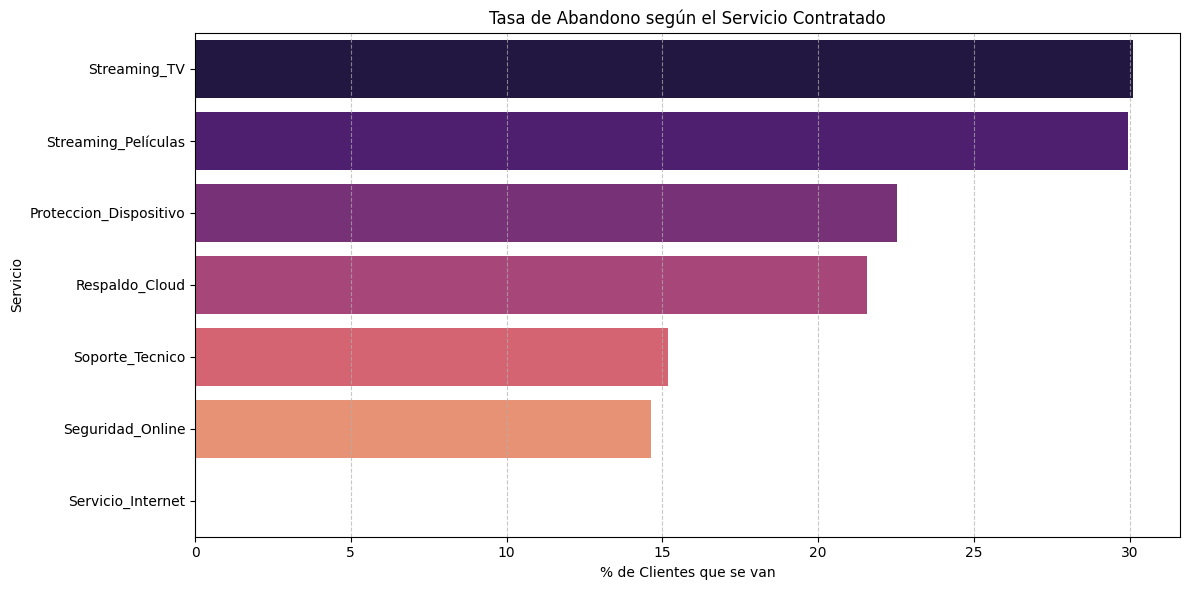

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de las columnas ya renombradas
servicios_limpios = list(nuevos_nombres.values())

# Calculamos el % de evasión para cada servicio (donde el servicio es 'Yes')
tasas_evasion = []
for servicio in servicios_limpios:
    # Calculamos qué % de los que tienen el servicio terminaron en Evasión = 'Si'
    filtro_servicio = clientes[clientes[servicio] == 1]
    tasa = (filtro_servicio['churn'] == 1).mean() * 100
    tasas_evasion.append(tasa)

# Creamos un DataFrame para graficar fácilmente
df_analisis = pd.DataFrame({'Servicio': servicios_limpios, 'churn': tasas_evasion})
df_analisis = df_analisis.sort_values('churn', ascending=False)

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='churn', y='Servicio', data=df_analisis, palette='magma')

plt.title('Tasa de Abandono según el Servicio Contratado')
plt.xlabel('% de Clientes que se van')
plt.ylabel('Servicio')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()